# Convergence

This notebooks shows a convergence study of one of the methods.

### Import some global dependencies

In [20]:
import __context__

import numpy as np
import matplotlib.pyplot as plt

### Define matrix and parameters

We produce an artificial matrix which has eigenvalues that are uniformly spaced within $[-1, 1]$.

In [21]:
from src.matrices import uniform

a = -1  # smallest eigenvalue
b = 1  # largest eigenvalue

# Generate matrix
A = uniform(n=500, a=-1, b=1)

# Set the parameters for the algorithms
n_t = 200
t = np.linspace(a, b, n_t)
sigma = 0.01
m = 2000
n_v = 80

### Convergence study

We study the convergence in the following relative $L^1$-norm

$$
\frac{\sum_{i=1}^{n_t} |\breve{\phi}_{\sigma}^{(m)}(t_i) - \phi_{\sigma}(t_i)|}{\sum_{i=1}^{n_t} |\phi_{\sigma}(t_i)|}.
$$

For this, we fix all parameters except the degree of the Chebyshev expansion $m$, which we choose logarithmically spaced between $100$ and $1000$.

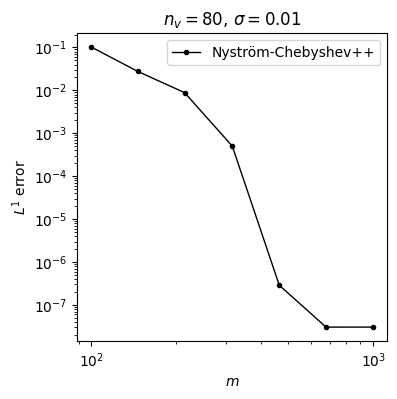

In [23]:
from src.algorithms import NCPP
from src.plots import compute_spectral_density_errors, plot_spectral_density_errors

method = NCPP
labels = ["Nyström-Chebyshev++"]
fixed_parameters = {"n_v": n_v, "sigma": sigma}
variable_parameters = "m"
variable_parameters_values = (np.logspace(2, 3, 7).astype(int) // 2) * 2

spectral_density_errors = compute_spectral_density_errors(A, method, labels, variable_parameters, variable_parameters_values, fixed_parameters, n_t=100)

plot_spectral_density_errors(spectral_density_errors, fixed_parameters, variable_parameters, variable_parameters_values, error_metric_name="$L^1$ error")
plt.show()